In [39]:
#installing the libraries
!pip3 install featurewiz
!pip install -U scikit-learn scipy matplotlib
!pip install sklearn

In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from featurewiz import featurewiz

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from tabulate import tabulate

Imported version = 0.1.55.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [3]:
#loading the dataset
fraud_data = pd.read_csv('Fraud_Detection_Data.csv')
fraud_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#Descriptive Analysis & EDA

In [5]:
#displaying number of rows and columns
print("Total number of Rows and Columns:",fraud_data.shape)

Total number of Rows and Columns: (6362620, 11)


In [6]:
#displaying the data field values
print("\nColumn Names:\n",fraud_data.columns)


Column Names:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [7]:
#displaying the data types
print("\nData types:\n", fraud_data.dtypes)


Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [8]:
#information about the dataframe
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
#Statistical Analysis

#describing the dataset
round(fraud_data.describe(),2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [ ]:
#Data Cleaning

In [10]:
#listing field names
column_names = fraud_data.columns
column_names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
#upper casing the field values
fraud_data.columns = fraud_data.columns.str.upper()
fraud_data.columns

Index(['STEP', 'TYPE', 'AMOUNT', 'NAMEORIG', 'OLDBALANCEORG', 'NEWBALANCEORIG',
       'NAMEDEST', 'OLDBALANCEDEST', 'NEWBALANCEDEST', 'ISFRAUD',
       'ISFLAGGEDFRAUD'],
      dtype='object')

In [12]:
#checking for null values in the each column of the dataset
for x in range(11):
    print("%-45s %10d" % (fraud_data.columns.values[x], fraud_data.iloc[:,x].isna().sum()))

STEP                                                   0
TYPE                                                   0
AMOUNT                                                 0
NAMEORIG                                               0
OLDBALANCEORG                                          0
NEWBALANCEORIG                                         0
NAMEDEST                                               0
OLDBALANCEDEST                                         0
NEWBALANCEDEST                                         0
ISFRAUD                                                0
ISFLAGGEDFRAUD                                         0


In [ ]:
#Data Visualization - Tableau

In [ ]:
#Correlation Plot

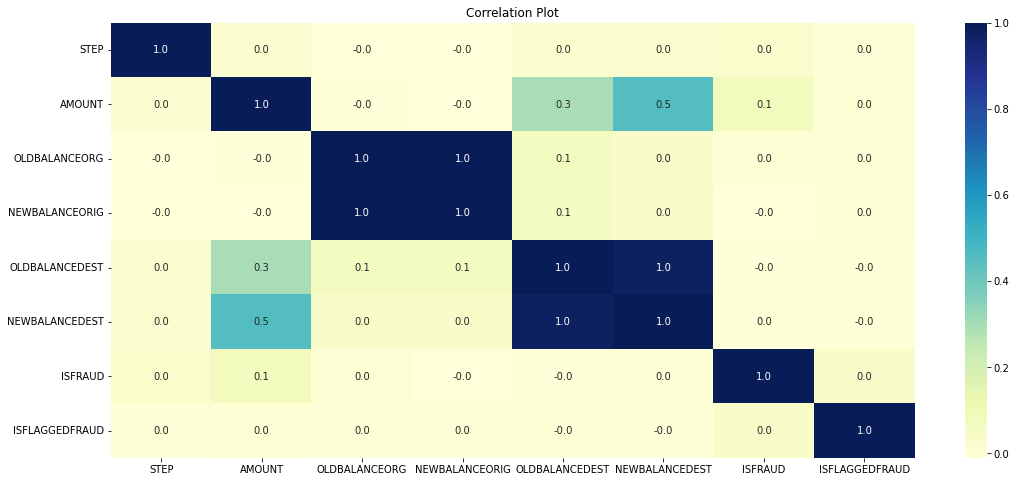

In [13]:
plt.figure(figsize = (18,8))
ax = plt.subplot()
sns.heatmap(fraud_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot'); 

In [14]:
#exploring data columns

print("Unique count of Transaction Types\n",fraud_data['TYPE'].value_counts())

Unique count of Transaction Types
 CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: TYPE, dtype: int64


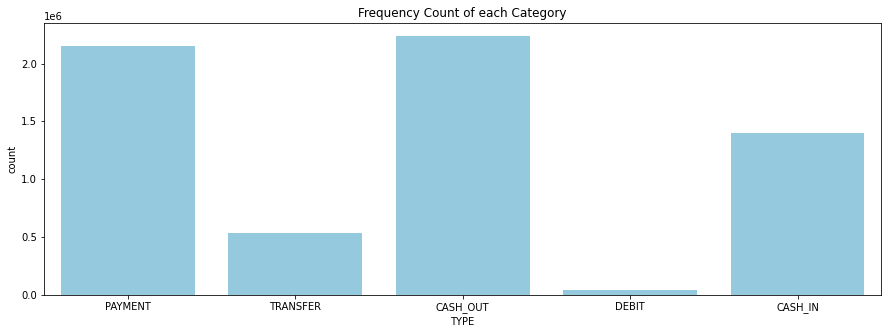

In [15]:
#plotting the count of unique values for transaction types
plt.figure(figsize=(15,5))
plt.title("Frequency Count of each Category")
plt.ylabel("Count")
colors = ['skyblue']
plot = sns.countplot(x="TYPE", data=fraud_data, palette=colors)

In [ ]:
#Feature Selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (6362620, 11)
    Caution: We will try to reduce the memory usage of dataframe from 533.97 MB
        memory usage after optimization is: 462.98 MB
        decreased by 13.3%
    Loaded train data. Shape = (6362620, 11)
 setting a hard limit of 900K samples for train since some it is huge and breaks pandas...
No test data filename given...
Classifying features using a random 

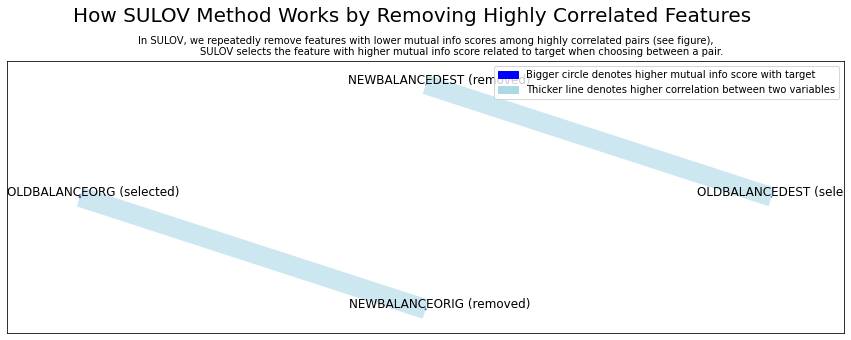

Time taken for SULOV method = 61 seconds
    Adding 3 categorical variables to reduced numeric variables  of 4
Final list of selected vars after SULOV = 7
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (900000, 10)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 7 
    XGBoost version: 1.6.1
Number of booster rounds = 20
        using 7 variables...
            Time taken for regular XGBoost feature selection = 28 seconds
        using 5 variables...
            Time taken for r

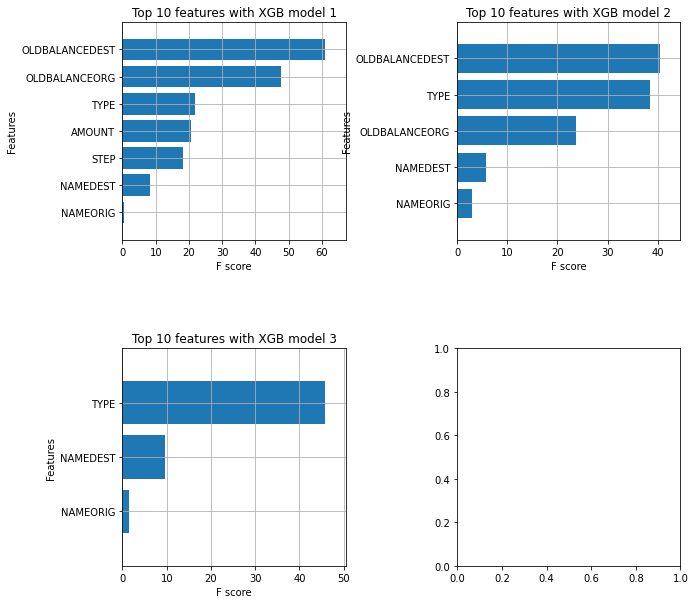

            Total time taken for XGBoost feature selection = 60 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 7 important features:
['OLDBALANCEDEST', 'OLDBALANCEORG', 'TYPE', 'AMOUNT', 'STEP', 'NAMEDEST', 'NAMEORIG']

    Time taken for feature selection = 170 seconds
Returning 2 dataframes: dataname and test_data with 7 important features.


In [35]:
#automatic feature selection
target = 'ISFRAUD'

features, train = featurewiz(fraud_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [36]:
print("Important Features Selected are:",features)

Important Features Selected are: ['OLDBALANCEDEST', 'OLDBALANCEORG', 'TYPE', 'AMOUNT', 'STEP', 'NAMEDEST', 'NAMEORIG']


In [5]:
#label encoding

labelencoder = LabelEncoder()
fraud_data['Transaction Type']  = labelencoder.fit_transform(fraud_data["TYPE"])

In [39]:
fraud_data.head(10)

,STEP,TYPE,AMOUNT,NAMEORIG,OLDBALANCEORG,NEWBALANCEORIG,NAMEDEST,OLDBALANCEDEST,NEWBALANCEDEST,ISFRAUD,ISFLAGGEDFRAUD,Transaction Type
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,3
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,3
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,3
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,3
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,3
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,2


In [6]:
#extracting the features and labels

x = np.array(fraud_data[["Transaction Type", "AMOUNT", "OLDBALANCEORG","OLDBALANCEDEST","NEWBALANCEORIG","NEWBALANCEDEST"]])
y = np.array(fraud_data[["ISFRAUD"]])

In [7]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(5090096, 6)
(1272524, 6)


In [7]:
#Logistic Regression Model

logisticregression_model = LogisticRegression()
logisticregression_model = logisticregression_model.fit(X_train, y_train)

c:\Users\rramb\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#prediction for test set
predicted_LR = logisticregression_model.predict(X_test)

In [9]:
#accuracy of the logistic regression model for training and testing set

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logisticregression_model.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set:     {:.2f}'.format(logisticregression_model.score(X_test, y_test)))

testaccuracy_LR = logisticregression_model.score(X_test, y_test)
accuracy_result_LR = round(testaccuracy_LR,2)
accuracy_result_LR

Accuracy of Logistic Regression on training set: 1.00
Accuracy of Logistic Regression on test set:     1.00


1.0

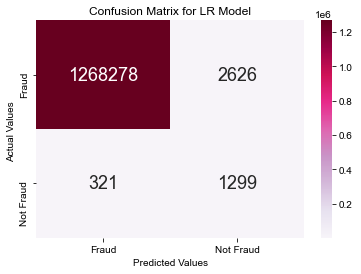

In [10]:
#confusion matrix for LR Model

confusion_matrix_LR = confusion_matrix(y_test, predicted_LR)


fig = sns.heatmap(confusion_matrix_LR, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='d')
fig.xaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.yaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for LR Model')
sns.set(font_scale=1.4)

In [11]:
#classification report for LR Model

print("\n Classification report %s:\n%s\n" % (logisticregression_model, metrics.classification_report(y_test, predicted_LR)))


 Classification report LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.33      0.80      0.47      1620

    accuracy                           1.00   1272524
   macro avg       0.67      0.90      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524




In [12]:
#Random Forest Classifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)

C:\Users\rramb\AppData\Local\Temp/ipykernel_22908/4098600538.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_model.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
#prediction for test set
predicted_RFC = randomforest_model.predict(X_test)

In [14]:
#accuracy of the random forest classifier for training and testing set

print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

accuracy_result_RFC = randomforest_model.score(X_test, y_test)
accuracy_result_RFC

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set:     1.00


0.9996966658389154

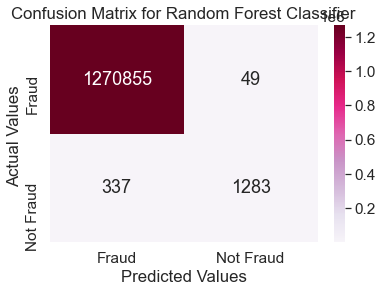

In [15]:
#confusion matrix

confusion_matrix_RFC = confusion_matrix(y_test, predicted_RFC)


fig = sns.heatmap(confusion_matrix_RFC, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='d')
fig.xaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.yaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for Random Forest Classifier')
sns.set(font_scale=1.4)

In [16]:
#classification report for Random Forest Classifier Model

print("\n Classification report %s:\n%s\n" % (randomforest_model, metrics.classification_report(y_test, predicted_RFC)))


 Classification report RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524




In [8]:
#XGBoost Classifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [9]:
#prediction for test set
predicted_XGB = model_XGB.predict(X_test)

In [10]:
#accuracy of the XGB model for training and testing set

print('Accuracy of XGB on training set: {:.2f}'.format(model_XGB.score(X_train, y_train)))
print('Accuracy of XGB on test set:     {:.2f}'.format(model_XGB.score(X_test, y_test)))

accuracy_result_XGB = model_XGB.score(X_test, y_test)
accuracy_result_XGB = round(accuracy_result_XGB,3)
accuracy_result_XGB

Accuracy of XGB on training set: 1.00
Accuracy of XGB on test set:     1.00


1.0

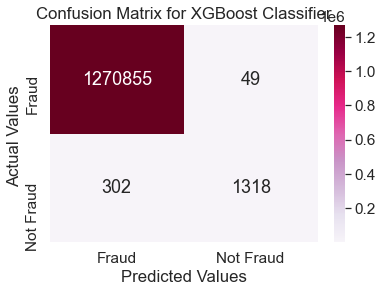

In [12]:
#confusion matrix

confusion_matrix_XGB = confusion_matrix(y_test, predicted_XGB)


fig = sns.heatmap(confusion_matrix_XGB, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='d')
fig.xaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.yaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for XGBoost Classifier')
sns.set(font_scale=1.4)

In [13]:
#classification report for XGB Model

print("\n Classification report %s:\n%s\n" % (model_XGB, metrics.classification_report(y_test, predicted_XGB)))


 Classification report XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.81      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.91      0.94   1272524
weig

In [14]:
#Decision Tree Classifier

model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
#prediction for test set
predicted_decisiontree = model_decisiontree.predict(X_test)

In [16]:
#accuracy of the Decision Tree model for training and testing set

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(model_decisiontree.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set:     {:.2f}'.format(model_decisiontree.score(X_test, y_test)))

accuracy_result_decisiontree = model_decisiontree.score(X_test, y_test)
accuracy_result_decisiontree = round(accuracy_result_decisiontree,3)
accuracy_result_decisiontree

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set:     1.00


1.0

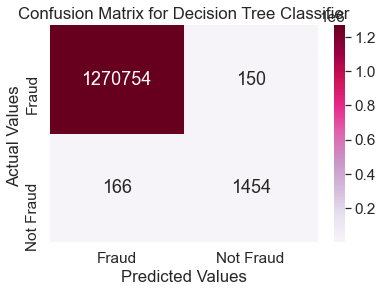

In [18]:
#confusion matrix

confusion_matrix_decisiontree = confusion_matrix(y_test, predicted_decisiontree)


fig = sns.heatmap(confusion_matrix_decisiontree, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='d')
fig.xaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.yaxis.set_ticklabels(['Fraud','Not Fraud'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for Decision Tree Classifier')
sns.set(font_scale=1.4)

In [19]:
#classification report for Decision Tree Model

print("\n Classification report %s:\n%s\n" % (model_decisiontree, metrics.classification_report(y_test, predicted_decisiontree)))


 Classification report DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.90      0.90      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524


